# Visualizing the Loss Surface in 3D for Linear Regression

### Objective
To understand how **Gradient Descent** moves across the **Mean Squared Error (MSE) loss surface**  
for linear regression by plotting:
1. The 3D loss landscape \( J(w,b) \)
2. The descent trajectory of parameters \((w,b)\)

---

### Mathematical Background

For data \( (x_i, y_i) \), the MSE loss is:

\[
J(w, b) = \frac{1}{N} \sum_{i=1}^N (y_i - (wx_i + b))^2
\]

Gradient Descent updates:
\[
\begin{aligned}
w &:= w - \eta \frac{\partial J}{\partial w} \\
b &:= b - \eta \frac{\partial J}{\partial b}
\end{aligned}
\]

The loss surface \( J(w, b) \) is a **convex paraboloid** —  
the algorithm moves downhill along this curved surface toward the global minimum.


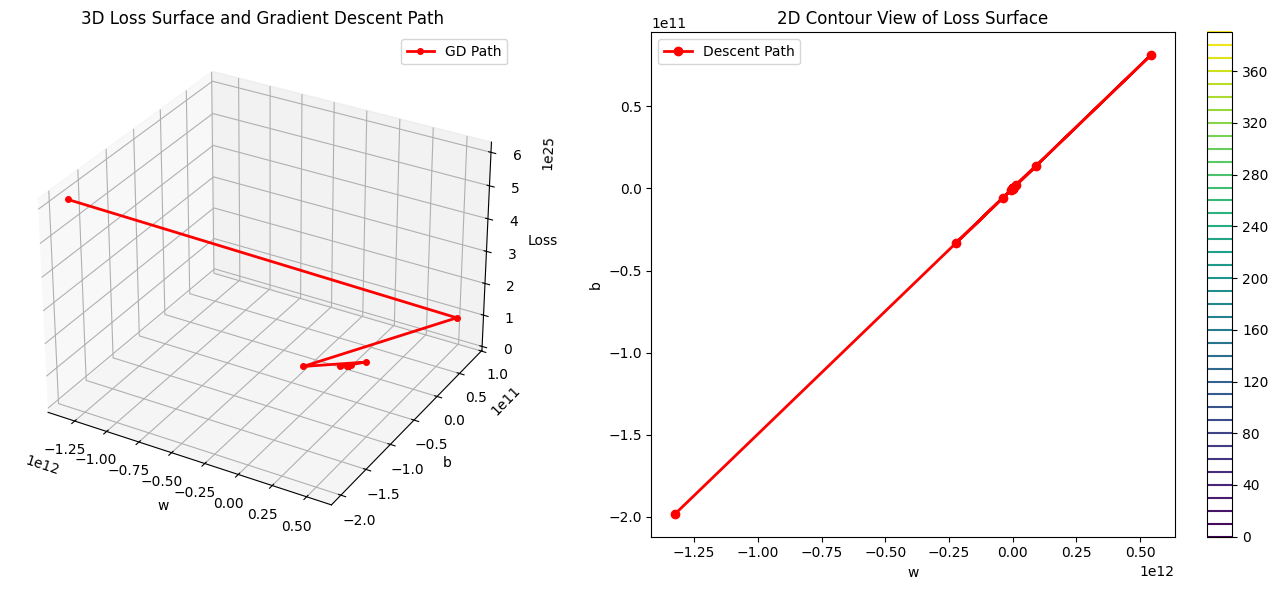

Final parameters: w ≈ -1324485340506.666, b ≈ -198148750707.227, Loss ≈ 61735782213986992225517568.000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Generate synthetic data ---
np.random.seed(42)
X = np.linspace(0, 10, 50)
true_w, true_b = 2.5, 5
y = true_w * X + true_b + np.random.randn(*X.shape) * 2.0

# --- Step 2: Define loss function ---
def compute_loss(w, b):
    y_pred = w * X + b
    return np.mean((y - y_pred)**2)

# --- Step 3: Create grid of w and b values for visualization ---
W = np.linspace(0, 5, 100)
B = np.linspace(0, 10, 100)
WW, BB = np.meshgrid(W, B)
ZZ = np.array([[compute_loss(w, b) for w in W] for b in B])

# --- Step 4: Gradient Descent optimization ---
w, b = 0.0, 0.0
lr = 0.05
epochs = 30
path = []

for i in range(epochs):
    y_pred = w * X + b
    dw = -2 * np.mean(X * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    w -= lr * dw
    b -= lr * db
    path.append((w, b, compute_loss(w, b)))

path = np.array(path)

# --- Step 5: 3D Surface Visualization ---
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(WW, BB, ZZ, cmap='viridis', alpha=0.8)
ax.plot(path[:,0], path[:,1], path[:,2], color='r', marker='o', markersize=4, linewidth=2, label='GD Path')
ax.set_title('3D Loss Surface and Gradient Descent Path')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.legend()

# --- Step 6: 2D Contour Plot ---
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(WW, BB, ZZ, levels=40, cmap='viridis')
ax2.plot(path[:,0], path[:,1], color='r', marker='o', linewidth=2, label='Descent Path')
ax2.set_title('2D Contour View of Loss Surface')
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.legend()
plt.colorbar(contours, ax=ax2)
plt.tight_layout()
plt.show()

# Final results
print(f"Final parameters: w ≈ {path[-1,0]:.3f}, b ≈ {path[-1,1]:.3f}, Loss ≈ {path[-1,2]:.3f}")


---

### 🔍 Interpretation

- The 3D paraboloid represents the **loss surface** for linear regression.
- Each red marker is a gradient descent step — showing how the optimizer slides down the surface.
- In the contour plot, you can see the same movement projected onto the \( (w, b) \)-plane.

---

### 🧠 Conceptual Bridge

| Optimization Concept | Machine Learning Equivalent |
|----------------------|-----------------------------|
| Newton’s Method | Second-order optimization (used in quasi-Newton solvers) |
| Gradient Descent | Backpropagation in neural networks |
| Loss Surface | Error landscape of model parameters |
| Convergence | Training stability and generalization |

This notebook unites **mathematics, visualization, and ML training intuition** —  
the same principles that underlie **IISc CDS** and **IIT Bombay CMInDS** interviews.

---

**Next Step (Level 6)**: Implement **Polynomial Regression (degree 2)** and visualize **overfitting vs. underfitting** with train/test data.  
